In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
p18 = pd.read_csv('players_18.csv', encoding='latin-1') #players_18.csv file, some of the cases we encoded in latin1
p19 = pd.read_csv('players_19.csv', encoding='latin-1') #players_19.csv file, some of the cases we encoded in latin1
m_results = pd.read_csv('match_result.csv', encoding='latin-1') #match_results.csv file, some of the cases we encoded in latin1

In [10]:
p18.shape

(17592, 104)

In [4]:
p19.shape

(17770, 104)

In [5]:
m_results.shape

(2984, 22)

In [3]:
#dropping unneeded variables from the player_18 and player_19 csv files first

#list of variables of interest (voi) that we want to keep for our models
voi_player = ['short_name', 'age', 'height_cm', 'weight_kg', 'club', 'wage_eur',
      'pace' ,'shooting', 'passing', 'dribbling', 'defending',
      'gk_handling', 'gk_speed', 'gk_kicking', 'gk_diving', 'gk_positioning']

columns_list_18 = p18.columns.values.tolist() #list of all columns
columns_list_19 = p19.columns.values.tolist()

for i in range(len(columns_list_18)): #iterate through list of columns
    if columns_list_18[i] not in voi_player: #if column is not in our variables of interest list
        p18.pop(columns_list_18[i]) #remove it from the df
        
for i in range(len(columns_list_19)):
    if columns_list_19[i] not in voi_player:
        p19.pop(columns_list_19[i])

In [4]:
p18['short_name'] = p18['short_name'].astype('category') #setting to correct variable types
p18['club'] = p18['club'].astype('category') #setting to correct variable types
p19['short_name'] = p19['short_name'].astype('category') #setting to correct variable types
p19['club'] = p19['club'].astype('category') #setting to correct variable types

In [14]:
p18.shape #confirming we cut out the 87 unneeded columns

(17592, 16)

In [15]:
p19.shape #confirming we cut out the 87 unneeded columns

(17770, 16)

In [5]:
#dropping unneeded variables from the match_results csv

#list of variables of interest (voi) that we want to keep for our models
voi_match = ['FTHG', 'FTAG', 'FTR', 'HomeTeam', 'AwayTeam']

columns_list_match = m_results.columns.values.tolist()

for i in range(len(columns_list_match)): #iterate through list of columns
    if columns_list_match[i] not in voi_match: #if column is not in our variables of interest list
        m_results.pop(columns_list_match[i]) #remove it from the df

In [17]:
m_results.shape

(2984, 5)

In [18]:
m_results.head()

HomeTeam              AwayTeam  FTHG  FTAG FTR
0  Standard de Liège              KAA Gent     3     2   H
1        KV Kortrijk        RSC Anderlecht     1     4   A
2        KV Oostende  Royal Excel Mouscron     2     1   H
3  Sint-Truidense VV     KSV Cercle Brugge     0     0   D
4   SV Zulte-Waregem      Waasland-Beveren     2     2   D

In [6]:
m_results['HomeTeam'] = m_results['HomeTeam'].astype('category') #setting to correct variable types
m_results['AwayTeam'] = m_results['AwayTeam'].astype('category')
m_results['FTR'] = m_results['FTR'].astype('category')

In [7]:
p18.to_csv('players_18.csv')
p19.to_csv('players_19.csv')
m_results.to_csv('match_result.csv')

In [8]:
p18.describe()

age     height_cm     weight_kg       wage_eur          pace  \
count  17592.000000  17592.000000  17592.000000   17592.000000  15613.000000   
mean      25.167804    181.262335     75.367667   11747.896771     67.967655   
std        4.616512      6.686939      6.981683   23260.653038     11.297053   
min       16.000000    155.000000     49.000000       0.000000     21.000000   
25%       21.000000    177.000000     70.000000    2000.000000     62.000000   
50%       25.000000    181.000000     75.000000    4000.000000     69.000000   
75%       29.000000    186.000000     80.000000   12000.000000     76.000000   
max       47.000000    205.000000    110.000000  565000.000000     96.000000   

           shooting       passing     dribbling     defending    gk_diving  \
count  15613.000000  15613.000000  15613.000000  15613.000000  1979.000000   
mean      52.341318     57.080830     62.162429     50.762378    65.432542   
std       13.986126     10.688956     10.555916     17.396549     7.880674   
min       14.000000     24.000000     24.000000     14.000000    39.000000   
25%       42.000000     50.000000     56.000000     34.000000    60.000000   
50%       54.000000     58.000000     64.000000     56.000000    65.000000   
75%       63.000000     65.000000     69.000000     65.000000    71.000000   
max       93.000000     89.000000     96.000000     90.000000    91.000000   

       gk_handling   gk_kicking     gk_speed  gk_positioning  
count  1979.000000  1979.000000  1979.000000     1979.000000  
mean     62.967660    61.632643    39.220819       63.171299  
std       7.915821     7.851437    10.471409        8.769113  
min      43.000000    35.000000    12.000000       38.000000  
25%      58.000000    56.000000    31.000000       57.000000  
50%      63.000000    61.000000    41.000000       64.000000  
75%      68.000000    66.000000    46.000000       69.000000  
max      91.000000    95.000000    65.000000       91.000000

In [9]:
p19.describe()

age     height_cm     weight_kg       wage_eur          pace  \
count  17770.000000  17770.000000  17770.000000   17770.000000  15784.000000   
mean      25.193922    181.253292     75.310917    9956.162071     67.815319   
std        4.651957      6.745892      7.080013   22330.640048     11.329319   
min       16.000000    154.000000     50.000000       0.000000     24.000000   
25%       21.000000    176.000000     70.000000    1000.000000     61.000000   
50%       25.000000    181.000000     75.000000    3000.000000     69.000000   
75%       28.000000    186.000000     80.000000    9000.000000     75.000000   
max       45.000000    205.000000    110.000000  565000.000000     96.000000   

           shooting       passing     dribbling     defending    gk_diving  \
count  15784.000000  15784.000000  15784.000000  15784.000000  1986.000000   
mean      52.248733     57.082172     62.267169     51.665484    65.374622   
std       14.034645     10.589207     10.442659     16.347564     7.807033   
min       15.000000     24.000000     23.000000     15.000000    45.000000   
25%       42.000000     50.000000     57.000000     37.000000    60.000000   
50%       54.000000     58.000000     64.000000     56.000000    65.000000   
75%       63.000000     64.000000     69.000000     65.000000    71.000000   
max       93.000000     92.000000     96.000000     91.000000    91.000000   

       gk_handling   gk_kicking     gk_speed  gk_positioning  
count  1986.000000  1986.000000  1986.000000     1986.000000  
mean     62.931017    61.511078    38.675730       63.088117  
std       7.556389     7.667533    10.420846        8.664458  
min      43.000000    35.000000    12.000000       38.000000  
25%      58.000000    56.000000    30.000000       57.000000  
50%      63.000000    61.000000    40.000000       63.000000  
75%      68.000000    66.000000    46.000000       69.000000  
max      92.000000    91.000000    65.000000       90.000000

In [11]:
p18['wage_eur'] = np.log10(p18['wage_eur'])
p18['wage_eur']

C:\Users\HH\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:274: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


0        5.752048
1        5.752048
2        5.447158
3        5.361728
4        5.707570
           ...   
17587    3.000000
17588    3.000000
17589    3.000000
17590    3.000000
17591    3.000000
Name: wage_eur, Length: 17592, dtype: float64

Text(0.5, 1.0, 'Wage vs pace')

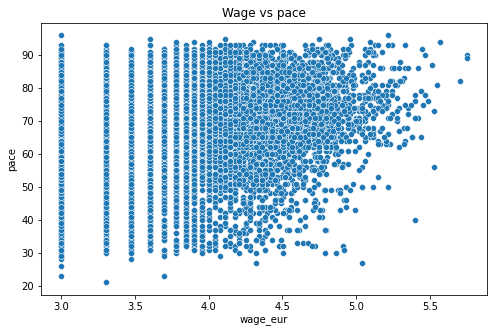

In [12]:
plt.figure(figsize = (8,5))
sns.scatterplot(x="wage_eur", y="pace", data=p18)
plt.title('Wage vs pace')

C:\Users\HH\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:274: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Wage vs pace')

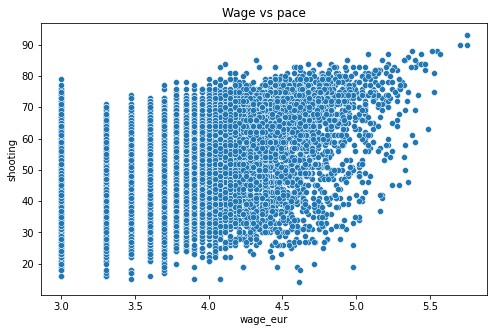

In [13]:
p19['wage_eur'] = np.log10(p19['wage_eur'])
plt.figure(figsize = (8,5))
sns.scatterplot(x="wage_eur", y="shooting", data=p18)
plt.title('Wage vs pace')